# 7. Sanity check

In this notebook I will try to prototype a sanity check.

Basically, I'm thinking of generating a markdown file with some text and images and then convert it to pdf or html using a beautiful template.

Keep it moving

# Basic tools

In [1]:
import textwrap

import jinja2
from IPython.display import display, Markdown

from cpe_help import Department, util

In [2]:
import jinja2  # add explicitly to env
jinja2.__version__

'2.10'

In [3]:
config = util.configuration.get_configuration()  # simplify later

year = config['Census'].getint('Year')
key_provided = config['Census']['Key'] != ''
ua = config['Downloads']['UserAgent']
variables = config['ACS Variables']
default_crs = util.crs.DEFAULT

In [4]:
template = """\
    Used ACS 5-year estimates from {{ year - 5 }} to {{ year }}.  
    Used TIGER shapefiles from {{ year }}.  
    Default CRS: `{{ default_crs }}`  
    Variables retrieved:
    
    {% for query_name, name in variables.items() -%}
    - {{ query_name.upper() }} - {{ name }}
    {% endfor %}
"""
template = textwrap.dedent(template)
template = jinja2.Template(template)
markdown = template.render(
    year=year,
    default_crs=default_crs,
    variables=variables,
)
print(markdown)

Used ACS 5-year estimates from 2011 to 2016.  
Used TIGER shapefiles from 2016.  
Default CRS: `{'init': 'epsg:4269', 'no_defs': True}`  
Variables retrieved:

- NAME - GEOGRAPHY_NAME
- B01003_001E - TOTAL_POPULATION
- B01001_001E - SEX_TOTAL
- B01001_002E - SEX_MALE
- B01001_026E - SEX_FEMALE
- B03002_001E - RACE_TOTAL
- B03002_003E - RACE_NH_WHITE
- B03002_004E - RACE_NH_BLACK
- B03002_005E - RACE_NH_INDIAN
- B03002_006E - RACE_NH_ASIAN
- B03002_007E - RACE_NH_HAWAIIAN
- B03002_008E - RACE_NH_OTHER
- B03002_009E - RACE_NH_MULTIRACIAL
- B03002_012E - RACE_HISPANIC
- B17021_001E - POVERTY_TOTAL
- B17021_002E - POVERTY_BPL
- B17021_019E - POVERTY_NOT_BPL
- B23025_003E - EMPLOYMENT_TOTAL
- B23025_004E - EMPLOYMENT_EMPLOYED
- B23025_005E - EMPLOYMENT_UNEMPLOYED



In [5]:
display(Markdown(markdown))

Used ACS 5-year estimates from 2011 to 2016.  
Used TIGER shapefiles from 2016.  
Default CRS: `{'init': 'epsg:4269', 'no_defs': True}`  
Variables retrieved:

- NAME - GEOGRAPHY_NAME
- B01003_001E - TOTAL_POPULATION
- B01001_001E - SEX_TOTAL
- B01001_002E - SEX_MALE
- B01001_026E - SEX_FEMALE
- B03002_001E - RACE_TOTAL
- B03002_003E - RACE_NH_WHITE
- B03002_004E - RACE_NH_BLACK
- B03002_005E - RACE_NH_INDIAN
- B03002_006E - RACE_NH_ASIAN
- B03002_007E - RACE_NH_HAWAIIAN
- B03002_008E - RACE_NH_OTHER
- B03002_009E - RACE_NH_MULTIRACIAL
- B03002_012E - RACE_HISPANIC
- B17021_001E - POVERTY_TOTAL
- B17021_002E - POVERTY_BPL
- B17021_019E - POVERTY_NOT_BPL
- B23025_003E - EMPLOYMENT_TOTAL
- B23025_004E - EMPLOYMENT_EMPLOYED
- B23025_005E - EMPLOYMENT_UNEMPLOYED


# Sanity check

In [28]:
import os
import pathlib

import matplotlib.pyplot

from cpe_help import Department, util

In [7]:
depts = Department.list()

In [8]:
dept_count = len(depts)
print(" There is data from {} departments".format(dept_count))

 There is data from 13 departments


In [9]:
print(" Departments:\n")
for dept in depts:
    print(" -", dept.full_name)

 Departments:

 - 00-00001 (St. Paul, MN)
 - 11-00091 (Boston, MA)
 - 23-00089 (Lawrence, IN)
 - 24-00013 (Minneapolis, MN)
 - 24-00098 (St. Paul, MN)
 - 35-00016 (Orlando, FL)
 - 35-00103 (Charlotte, NC)
 - 37-00027 (Austin, TX)
 - 37-00049 (Dallas, TX)
 - 49-00009 (Seattle, WA)
 - 49-00033 (Los Angeles, CA)
 - 49-00035 (Oakland, CA)
 - 49-00081 (San Francisco, CA)


In [29]:
[pathlib.Path(parent) / file
 for parent, _, files in os.walk(dept.output_dir) 
 for file in files]

[PosixPath('/amnt/code/cpe/data/output/department/00-00001/acs/block_groups.geojson'),
 PosixPath('/amnt/code/cpe/data/output/department/00-00001/acs/police_precincts.geojson'),
 PosixPath('/amnt/code/cpe/data/output/department/00-00001/acs/city_stats.json'),
 PosixPath('/amnt/code/cpe/data/output/department/00-00001/acs/census_tracts.geojson')]

In [36]:
def list_files(directory):
    """list all files under a directory tree"""
    return [pathlib.Path(parent) / file
            for parent, _, files in os.walk(directory) 
            for file in files]


for dept in depts:
    # TODO: print all paths relative to data
    crs = util.io.load_shp(dept.spatial_input_dir).crs
    input_files = list_files(dept.input_dir)
    output_files = list_files(dept.output_dir)
    dept_files = dept.files
    
    print("\nInput shapefile CRS:", crs)
    print("\nInput files:", input_files)
    print("\nOutput files:", output_files)
    print("\nDepartment files (to process):", dept_files)
    
    break


Input shapefile CRS: {'init': 'epsg:4326'}

Input files: [PosixPath('/amnt/code/cpe/data/input/department/00-00001/spatial/StPaul_geo_export_6646246d-0f26-48c5-a924-f5a99bb51c47.dbf'), PosixPath('/amnt/code/cpe/data/input/department/00-00001/spatial/StPaul_geo_export_6646246d-0f26-48c5-a924-f5a99bb51c47.shx'), PosixPath('/amnt/code/cpe/data/input/department/00-00001/spatial/StPaul_geo_export_6646246d-0f26-48c5-a924-f5a99bb51c47.prj'), PosixPath('/amnt/code/cpe/data/input/department/00-00001/spatial/StPaul_geo_export_6646246d-0f26-48c5-a924-f5a99bb51c47.shp'), PosixPath('/amnt/code/cpe/data/input/department/00-00001/tabular/24-00098_Vehicle-Stops-data.csv')]

Output files: [PosixPath('/amnt/code/cpe/data/output/department/00-00001/acs/block_groups.geojson'), PosixPath('/amnt/code/cpe/data/output/department/00-00001/acs/police_precincts.geojson'), PosixPath('/amnt/code/cpe/data/output/department/00-00001/acs/city_stats.json'), PosixPath('/amnt/code/cpe/data/output/department/00-00001/ac

In [35]:
# spatial data
city = dept.load_city_metadata()
tracts = dept.load_census_tracts()
bgs = dept.load_block_groups()
precincts = dept.load_police_precincts()

# set common CRS (minimum distortion)
_proj = util.crs.equal_area_from_geodf(city)
city = city.to_crs(_proj)
tracts = tracts.to_crs(_proj)
bgs = bgs.to_crs(_proj)
precincts = precincts.to_crs(_proj)

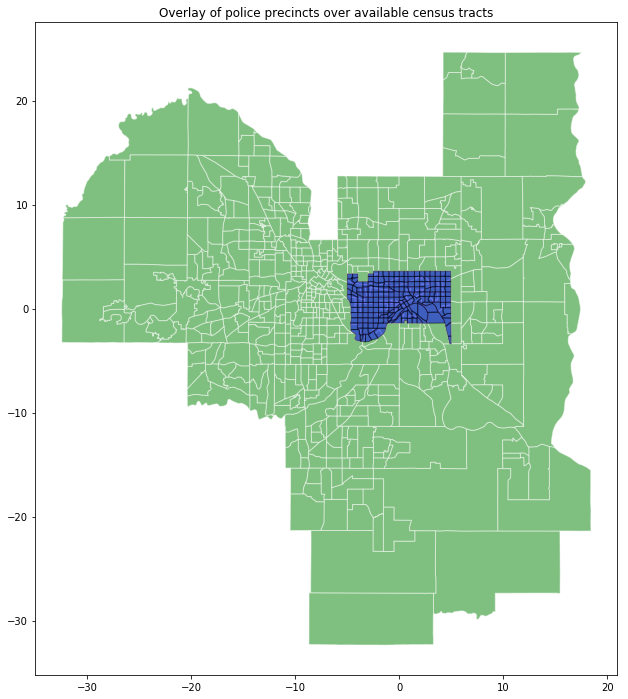

In [11]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))
ax.set_aspect('equal')

tracts.plot(ax=ax, color='green', edgecolor='white', alpha=0.5)
precincts.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

ax.set_title("Overlay of police precincts over available census tracts");

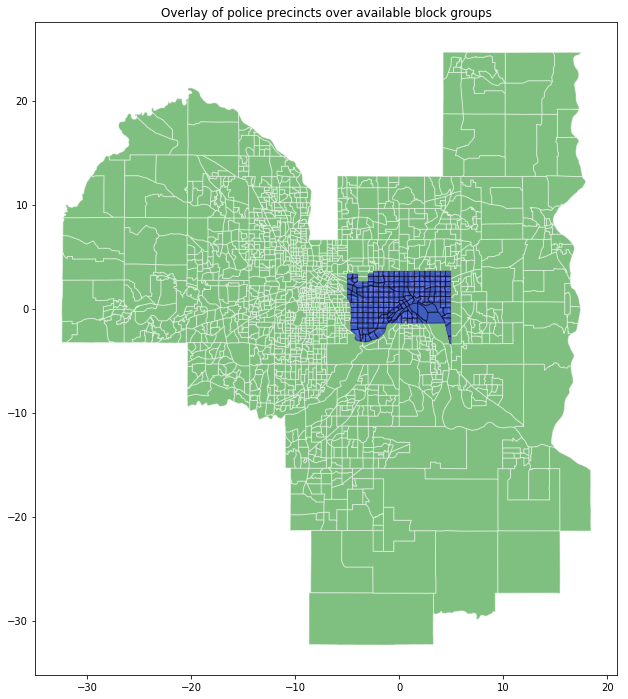

In [12]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))
ax.set_aspect('equal')

bgs.plot(ax=ax, color='green', edgecolor='white', alpha=0.5)
precincts.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

ax.set_title("Overlay of police precincts over available block groups");

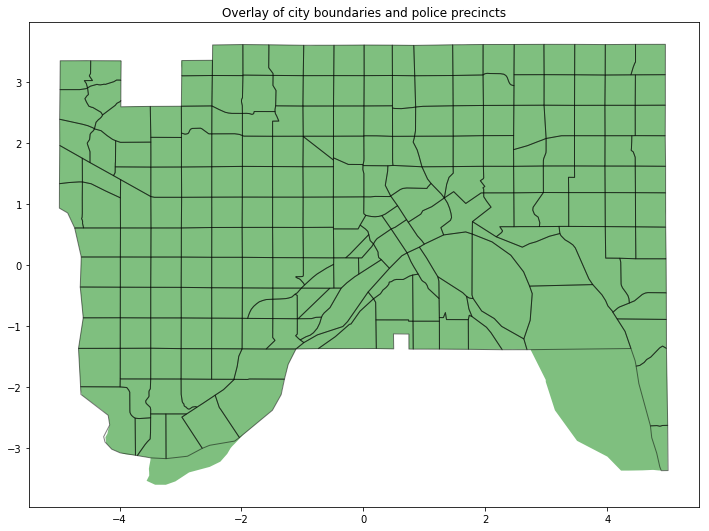

In [13]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))
ax.set_aspect('equal')

city.plot(ax=ax, color='green', alpha=0.5)
precincts.plot(ax=ax, color='none', edgecolor='black', alpha=0.5)

ax.set_title("Overlay of city boundaries and police precincts");

# TODO: create legend
# TODO: add false northing and easting to projection, so we can easily measure the city in miles

In [14]:
# get boundaries of precincts map

fig, ax = matplotlib.pyplot.subplots()
ax.set_aspect('equal')

precincts.plot(ax=ax)
bounds = ax.axis()

matplotlib.pyplot.close(fig)

bounds

(-5.485337458661159,
 5.4948825949534195,
 -3.7292825386039055,
 3.961385665376875)

In [15]:
tracts['POPULATION_DENSITY'] = tracts['TOTAL_POPULATION'] / tracts.area
bgs['POPULATION_DENSITY'] = bgs['TOTAL_POPULATION'] / bgs.area
precincts['POPULATION_DENSITY'] = precincts['TOTAL_POPULATION'] / precincts.area

In [16]:
patrol = precincts.unary_union
tracts = tracts[tracts.intersects(patrol)]
bgs = bgs[bgs.intersects(patrol)]

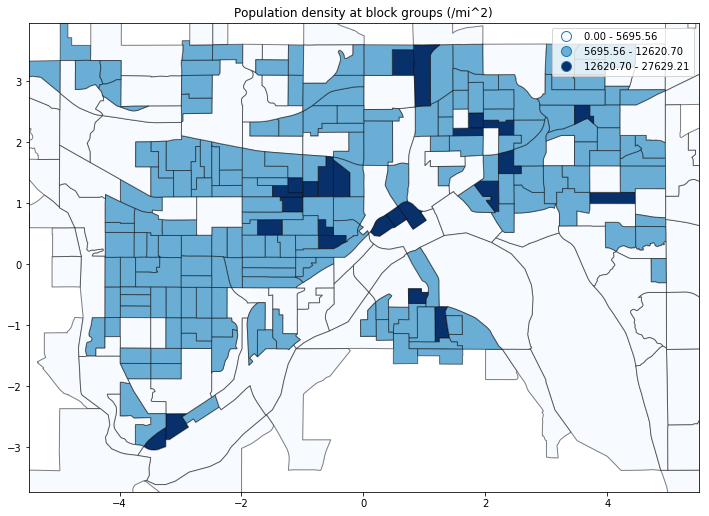

In [23]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))
ax.set_aspect('equal')

bgs.plot(
    ax=ax,
    column='POPULATION_DENSITY',
    cmap='Blues',
    edgecolor=(0, 0, 0, 0.5),
    scheme='fisher_jenks',
    k=3,
    legend=True,
)

ax.set_title("Population density at block groups (/mi^2)")
ax.axis(bounds);

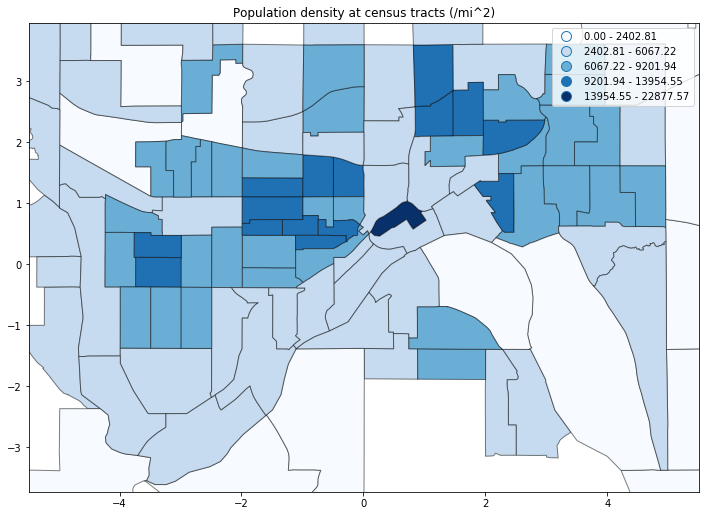

In [18]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))
ax.set_aspect('equal')

tracts.plot(
    ax=ax,
    column='POPULATION_DENSITY',
    cmap='Blues',
    edgecolor=(0, 0, 0, 0.5),
    scheme='fisher_jenks',
    k=5,
    legend=True,
)

ax.set_title("Population density at census tracts (/mi^2)")
ax.axis(bounds);

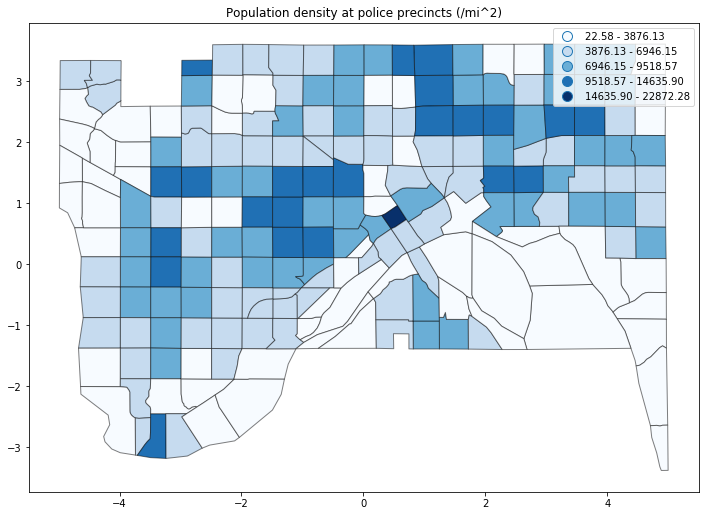

In [19]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))
ax.set_aspect('equal')

precincts.plot(
    ax=ax,
    column='POPULATION_DENSITY',
    cmap='Blues',
    edgecolor=(0, 0, 0, 0.5),
    scheme='fisher_jenks',
    k=5,
    legend=True,
)

ax.set_title("Population density at police precincts (/mi^2)")
ax.axis(bounds);

**TODO**:  Fix up background/face color issue: When facecolor is a gradient, it mixes with background color

Possible solution is to provide a background map (Stamen without text (?))

Other possible solution is to add a background color different to the map. Other solution still is to draw parallel lines in the back (something like seaborn default theme does).